In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Redshift

In [2]:
data = pd.read_csv('../data/redshift_results.csv')
data['run_group'] = ['first' if x == 1 else 'subsequent' for x in data['nth']]

In [3]:
cluster_info = data[['cluster_type', 'node_type', 'run_group']].drop_duplicates()

/Users/michaelkaminsky/.virtualenvs/compare-warehouse-distributions/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


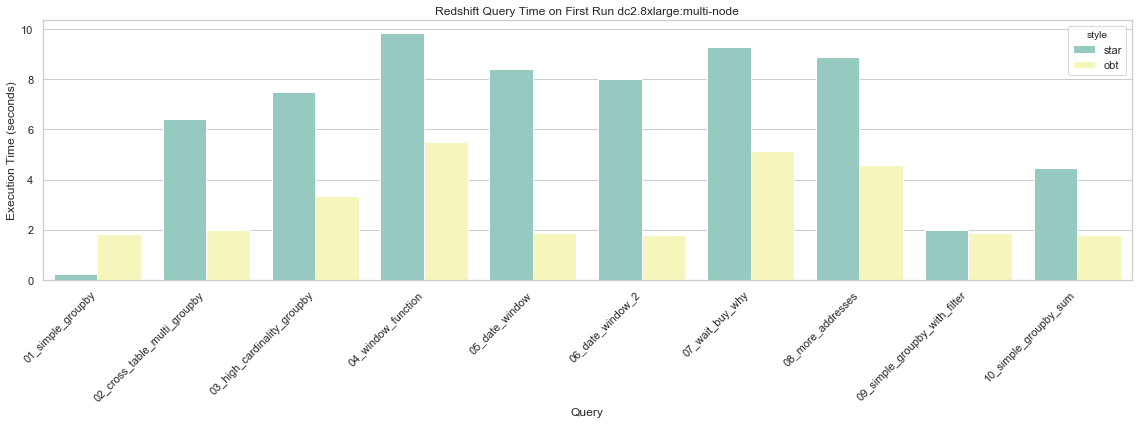

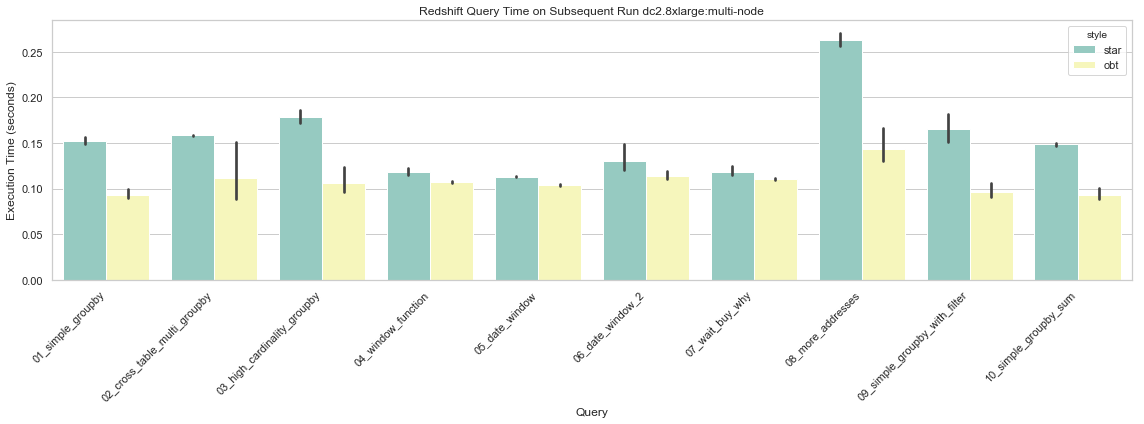

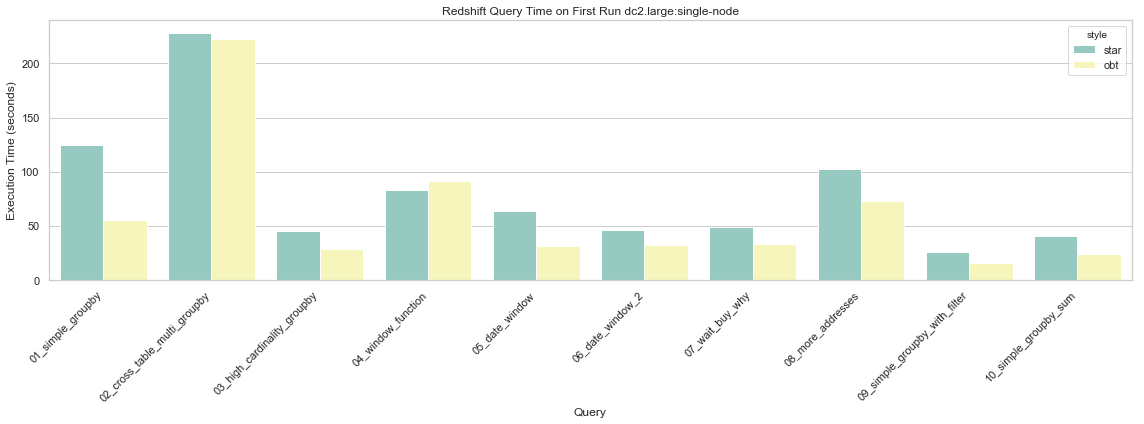

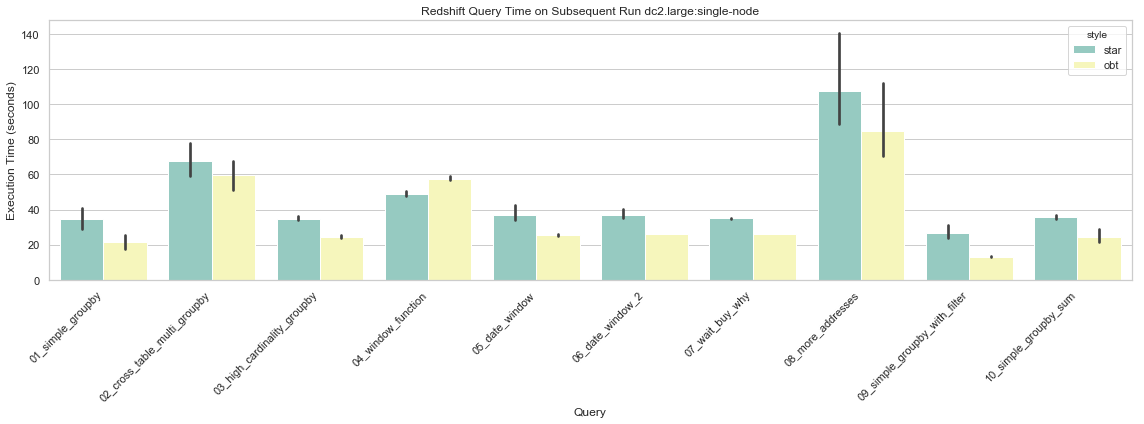

In [4]:
for index, row in cluster_info.iterrows():
    cluster_type = row['cluster_type']
    node_type = row['node_type']
    run_group = row['run_group']
    
    sub = data[(data['cluster_type'] == cluster_type) & 
               (data['node_type'] == node_type) & 
               (data['run_group'] == run_group)]
    
    plt.figure(figsize=(16, 6))
    g = sns.barplot(y="time", x="test", hue="style",data=sub, palette="Set3")
    g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
    g.set(xlabel='Query', ylabel='Execution Time (seconds)')
    g.set_title('Redshift Query Time on {} Run {}:{}'.format(run_group.title(), node_type, cluster_type))
    g.figure.savefig("images/{}_{}_{}.png".format(node_type,cluster_type,run_group))

In [5]:
avg = data.groupby(["cluster_type","node_type","run_group","style","test"]).agg({'time': 'mean'}).reset_index()
avg = avg.pivot_table(
    index=['test', 'cluster_type', 'run_group','node_type'], 
    columns='style',  
    values='time').reset_index()
avg['improvement'] = 1- avg['obt'] / avg['star']
avg

style,test,cluster_type,run_group,node_type,obt,star,improvement
0,01_simple_groupby,multi-node,first,dc2.8xlarge,1.815780,0.228969,-6.930241
1,01_simple_groupby,multi-node,subsequent,dc2.8xlarge,0.092790,0.152093,0.389908
2,01_simple_groupby,single-node,first,dc2.large,54.917727,124.442602,0.558690
3,01_simple_groupby,single-node,subsequent,dc2.large,21.407986,34.816606,0.385121
4,02_cross_table_multi_groupby,multi-node,first,dc2.8xlarge,1.995526,6.416618,0.689007
5,02_cross_table_multi_groupby,multi-node,subsequent,dc2.8xlarge,0.111129,0.158618,0.299394
6,02_cross_table_multi_groupby,single-node,first,dc2.large,222.601936,228.341397,0.025135
7,02_cross_table_multi_groupby,single-node,subsequent,dc2.large,59.541731,67.629292,0.119587
8,03_high_cardinality_groupby,multi-node,first,dc2.8xlarge,3.344764,7.509536,0.554598
9,03_high_cardinality_groupby,multi-node,subsequent,dc2.8xlarge,0.105997,0.178456,0.406034


In [6]:
avg.groupby(['cluster_type', 'node_type', 'run_group']).mean()

style                                      obt       star  improvement
cluster_type node_type   run_group                                    
multi-node   dc2.8xlarge first        2.968768   6.506390    -0.209277
                         subsequent   0.107819   0.154724     0.271096
single-node  dc2.large   first       60.454526  80.927980     0.312767
                         subsequent  36.310638  46.484410     0.251460

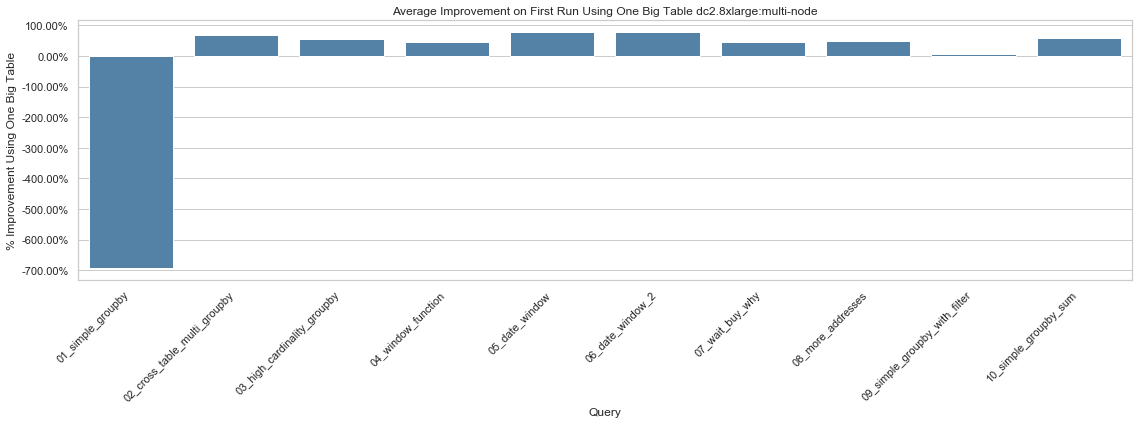

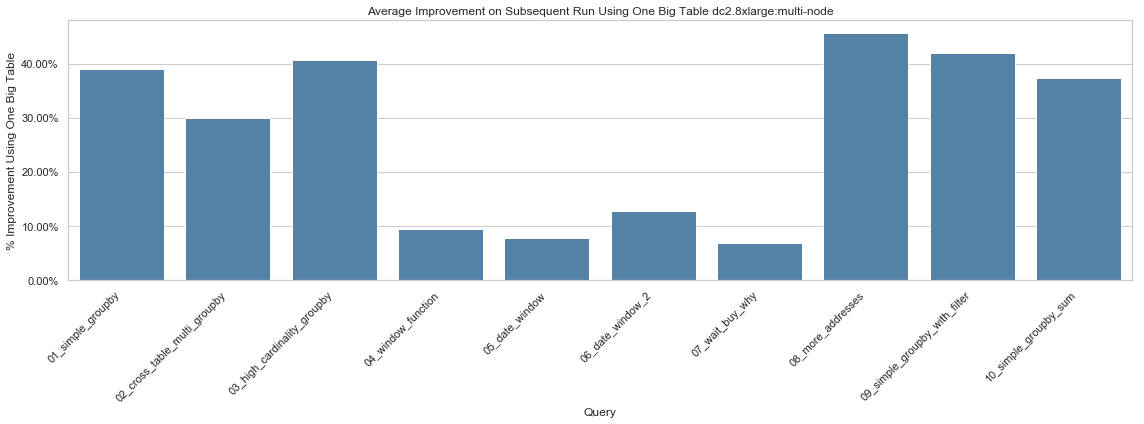

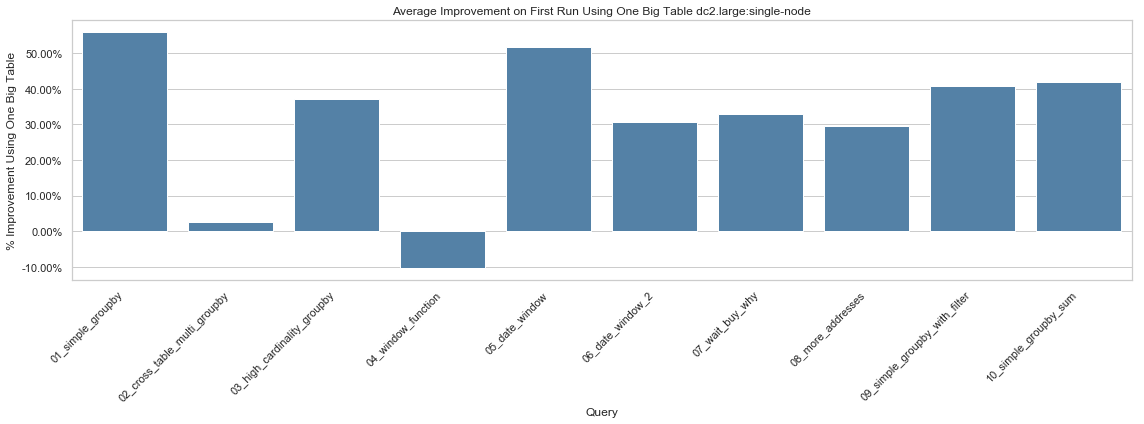

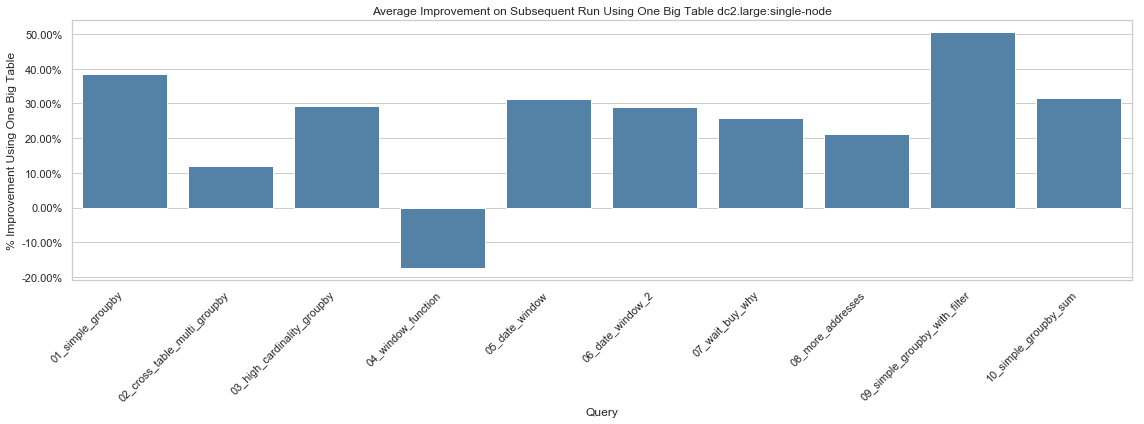

In [7]:
for index, row in cluster_info.iterrows():
    cluster_type = row['cluster_type']
    node_type = row['node_type']
    run_group = row['run_group']
    
    avg_sub = avg[(avg['cluster_type'] == cluster_type) & 
           (avg['node_type'] == node_type) & 
           (avg['run_group'] == run_group)]


    plt.figure(figsize=(16, 6))
    g = sns.barplot(y="improvement", x="test", data=avg_sub, color="steelblue")    
    g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
    g.set(xlabel='Query', ylabel='% Improvement Using One Big Table')
    vals = g.get_yticks()
    g.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
    g.set_title('Average Improvement on {} Run Using One Big Table {}:{}'.format(run_group.title(),node_type, cluster_type))


# Snowflake

In [8]:
data = pd.read_csv('../data/snowflake_results.csv')

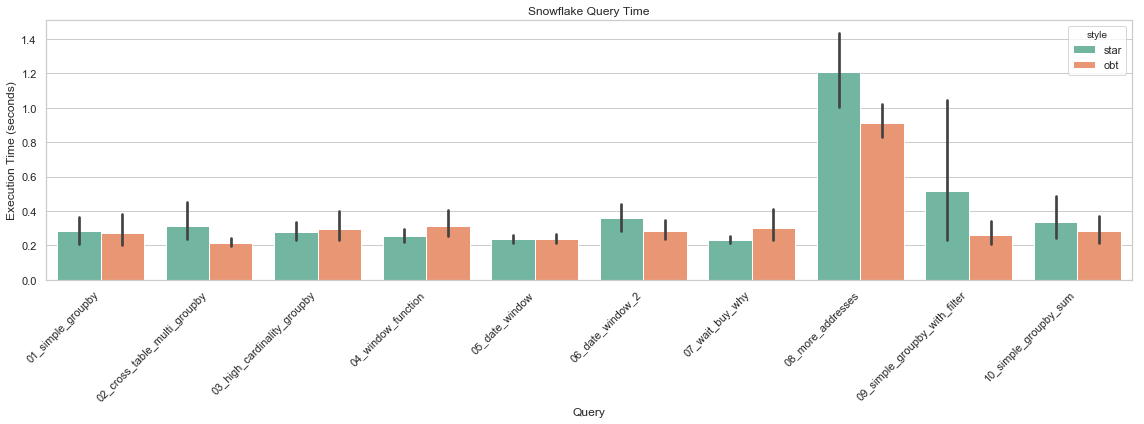

In [9]:
plt.figure(figsize=(16, 6))
g = sns.barplot(y="time", x="test", hue="style",data=data, palette="Set2")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
g.set(xlabel='Query', ylabel='Execution Time (seconds)')
g.set_title('Snowflake Query Time')
g.figure.savefig("images/snowflake.png".format(node_type,cluster_type,run_group))

In [10]:
avg = data.groupby(["style","test"]).agg({'time': 'mean'}).reset_index()
avg = avg.pivot(index='test', columns='style',  values='time').reset_index()
avg['improvement'] = 1- avg['obt'] / avg['star']
avg

style,test,obt,star,improvement
0,01_simple_groupby,0.274145,0.281867,0.027394
1,02_cross_table_multi_groupby,0.216420,0.314983,0.312914
2,03_high_cardinality_groupby,0.296119,0.279311,-0.060177
3,04_window_function,0.314709,0.253145,-0.243192
4,05_date_window,0.237586,0.237141,-0.001875
5,06_date_window_2,0.283755,0.360702,0.213326
6,07_wait_buy_why,0.300499,0.230887,-0.301499
7,08_more_addresses,0.913945,1.210662,0.245086
8,09_simple_groupby_with_filter,0.261481,0.518490,0.495687
9,10_simple_groupby_sum,0.283987,0.334408,0.150779


In [11]:
avg['improvement'].mean()

0.08384431218733558